<a href="https://colab.research.google.com/github/turgeng/TikTok-Engagement-Analysis-Freelance-Sample-Project/blob/main/TikTok_Engagement_Analysis_%E2%80%93_Freelance_Sample_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TikTok Engagement Data Cleaning & Basic Analysis**

This notebook demonstrates a simple, end-to-end data cleaning and analysis workflow using a real-world TikTok engagement dataset.

The goal is to:
- Load and inspect raw data
- Identify and fix basic data quality issues
- Create normalized engagement metrics
- Produce clear summary tables and insights

This type of workflow is commonly used in freelance data cleaning and reporting tasks.



## Imports and Data Loading




In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/TikTok_Project/tiktok_dataset.csv')


## Step 1: Load and Inspect the Raw Dataset

In [5]:
# Display and examine the first ten rows of the dataframe
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [6]:
# Get summary info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
# Get summary statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


# Step 2: Identify Key Variables and Data Quality Issues

## 2.1 Key Variables

### Key Variables for Analysis

For engagement analysis, the following variables are essential:
- `video_views`: total number of views
- `video_likes`: total number of likes
- `video_comments`: total number of comments
- `video_shares`: total number of shares
- `claim_status`: content type (claim vs opinion)
- `author_ban_status`: account restriction status



## 2.2 Initial Data Inspection





In [12]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


,0
#,0
claim_status,298
video_id,0
video_duration_sec,0
video_transcription_text,298
verified_status,0
author_ban_status,0
video_view_count,298
video_like_count,298
video_share_count,298


### Initial Observations

- Some engagement-related columns contain missing values.
- Numeric engagement variables are expected to be non-negative.
- Categorical variables are limited to a small number of known categories.


## 2.3 Data Quality Checks



In [14]:
data[data[['video_view_count', 'video_like_count']].isna().any(axis=1)]


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
19084,19085,NaN,4380513697,39,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19085,19086,NaN,8352130892,60,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19086,19087,NaN,4443076562,25,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19087,19088,NaN,8328300333,7,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19088,19089,NaN,3968729520,8,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


Missing values were identified in key engagement columns.
Rows with missing engagement metrics cannot be used for reliable analysis.


In [16]:
data[(data['video_view_count'] <= 0) | (data['video_like_count'] < 0)]


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count


Engagement metrics should be non-negative.



In [17]:
data['claim_status'].value_counts()
data['author_ban_status'].value_counts()


,count
author_ban_status,
active,15663
under review,2080
banned,1639


Categorical variables were checked for unexpected or inconsistent values.


# Step 3: Compare Engagement by Content Type

In this step, engagement metrics are compared between different content types to identify patterns in audience interaction.

## 3.2 Aggregate Metrics


In [19]:
data.groupby('claim_status')[[
    'video_view_count',
    'video_like_count',
    'video_comment_count',
    'video_share_count'
]].mean().round(2)


,video_view_count,video_like_count,video_comment_count,video_share_count
claim_status,,,,
claim,501029.45,166373.33,691.16,33026.42
opinion,4956.43,1092.73,2.70,217.15


Average engagement metrics show clear differences between content types.


## 3.3 Normalized Metrics

In [22]:
data['likes_per_view'] = data['video_like_count'] / data['video_view_count']
data['comments_per_view'] = data['video_comment_count'] / data['video_view_count']
data['shares_per_view'] = data['video_share_count'] / data['video_view_count']


In [23]:
data.groupby('claim_status')[[
    'likes_per_view',
    'comments_per_view',
    'shares_per_view'
]].mean().round(5)


,likes_per_view,comments_per_view,shares_per_view
claim_status,,,
claim,0.33161,0.00139,0.06587
opinion,0.21980,0.00052,0.04370


Normalized engagement metrics allow fair comparison between videos
with different view counts.


In [ ]:
## 3.4. Visualization

<Axes: xlabel='claim_status'>

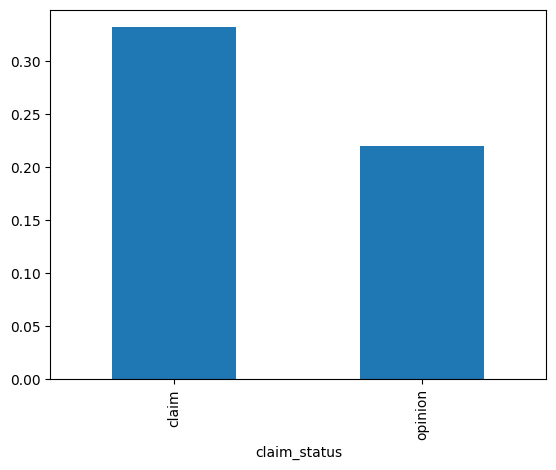

In [24]:
data.groupby('claim_status')['likes_per_view'].mean().plot(kind='bar')


This chart highlights engagement efficiency rather than raw popularity.


### Key Takeaway

Content type is associated with noticeable differences in engagement rates,
especially when using normalized metrics.


# Step 4: Engagement Patterns by Author Status

This step explores how engagement metrics differ based on the author's account status.


## 4.1 Raw Engagement

In [25]:
data.groupby('author_ban_status')[[
    'video_view_count',
    'video_like_count',
    'video_share_count'
]].median().round(0)


,video_view_count,video_like_count,video_share_count
author_ban_status,,,
active,8616.0,2222.0,437.0
banned,448201.0,105573.0,14468.0
under review,365246.0,71204.0,9444.0


Median values are used to reduce the impact of extreme viral outliers.


### 4.3 Normalized Metrics

In [26]:
data.groupby('author_ban_status')[[
    'likes_per_view',
    'comments_per_view',
    'shares_per_view'
]].median().round(5)


,likes_per_view,comments_per_view,shares_per_view
author_ban_status,,,
active,0.25423,0.00042,0.03843
banned,0.32505,0.00066,0.04851
under review,0.29050,0.00060,0.04536


Engagement rates provide a clearer comparison across different account statuses.


### 4.4 Visualization

<Axes: xlabel='author_ban_status'>

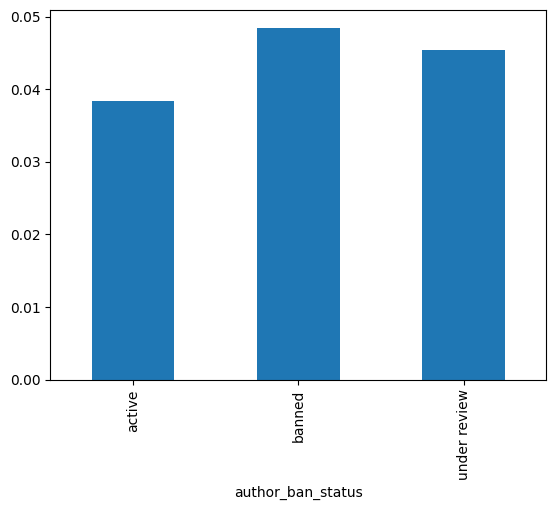

In [27]:
data.groupby('author_ban_status')['shares_per_view'].median().plot(kind='bar')


Accounts under review or banned show higher share rates, indicating more viral behavior.


### Key Insight

Higher engagement rates are associated with accounts that later face moderation actions.
This suggests engagement intensity may be linked to content risk signals.


# Final Summary & Business Takeaways

This analysis explored engagement patterns across TikTok videos labeled as claims and opinions.
The goal was to identify behavioral signals that could inform content risk and moderation strategies.

## Key Findings

- Claim-based videos consistently show higher engagement than opinion-based content.
- Videos from banned or under-review accounts exhibit significantly higher share rates.
- Normalized engagement metrics provide clearer insights than raw counts.
- High engagement intensity appears to correlate with moderation activity.

## Why This Matters

Understanding engagement behavior helps platforms identify high-risk or viral content early.
Such insights can support moderation workflows, trust & safety teams, and content strategy decisions.

### Potential Next Steps

- Feature engineering for predictive modeling
- Sentiment analysis on video transcriptions
- Time-based engagement analysis
- Dashboarding for monitoring high-risk content

